<a href="https://colab.research.google.com/github/alharidt16/text-Analysis/blob/main/UAS_TEXT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester Mata Kuliah Text Analysis
- Nama : Al Haridt Mahmudi
- NIM  : 2008108010004

## Get Dataset
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi Threads

In [2]:
!pip install google_play_scraper

In [3]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [4]:
result = reviews_all(
        'com.instagram.barcelona',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

threads = pd.DataFrame.from_records(result)
threads = threads[['at','userName' ,'content', 'score' ]]

In [5]:
threads

,at,userName,content,score
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5
2,2023-11-22 16:57:52,Gusti ngurah,baik,4
3,2023-11-22 15:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5
4,2023-11-22 14:58:02,Jhon Ndesit,Ok,5
...,...,...,...,...
5310,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5
5311,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5
5312,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5
5313,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [6]:
threads['at'] = pd.to_datetime(threads['at'])

# mengambil data dari tanggal 01-01-2023
data_review_threads= threads

In [7]:
data_review_threads

,at,userName,content,score
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5
2,2023-11-22 16:57:52,Gusti ngurah,baik,4
3,2023-11-22 15:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5
4,2023-11-22 14:58:02,Jhon Ndesit,Ok,5
...,...,...,...,...
5310,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5
5311,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5
5312,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5
5313,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4


## Text PreProcessing

In [8]:
!pip install nltk
!pip install sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


### Case with python with orbit data


In [9]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

data_review_threads['contentp'] = data_review_threads['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
data_review_threads['contentp_clean'] = all_preproc(data_review_threads['contentp'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 5315/5315 [00:00<00:00, 12479.00it/s]


In [10]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positif"
    elif rating == 3:
        return "Netral"
    elif (rating == 2) or (rating == 1):
        return "Negatif"
# Add sentiments to the data
data_review_threads["label"] = data_review_threads["score"].apply(sentiments)
data_review_threads

,at,userName,content,score,contentp,contentp_clean,label
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3,sementara,,Netral
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,Positif
2,2023-11-22 16:57:52,Gusti ngurah,baik,4,baik,baik,Positif
3,2023-11-22 15:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5,suka aku karna hemat kuota saya berharap aplik...,suka aku karna hemat kuota harap aplikasi akan...,Positif
4,2023-11-22 14:58:02,Jhon Ndesit,Ok,5,ok,oke,Positif
...,...,...,...,...,...,...,...
5310,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,Positif
5311,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,Positif
5312,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,Positif
5313,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,Positif


In [11]:
data_review_threads.label.value_counts()

Positif    3334
Negatif    1445
Netral      536
Name: label, dtype: int64

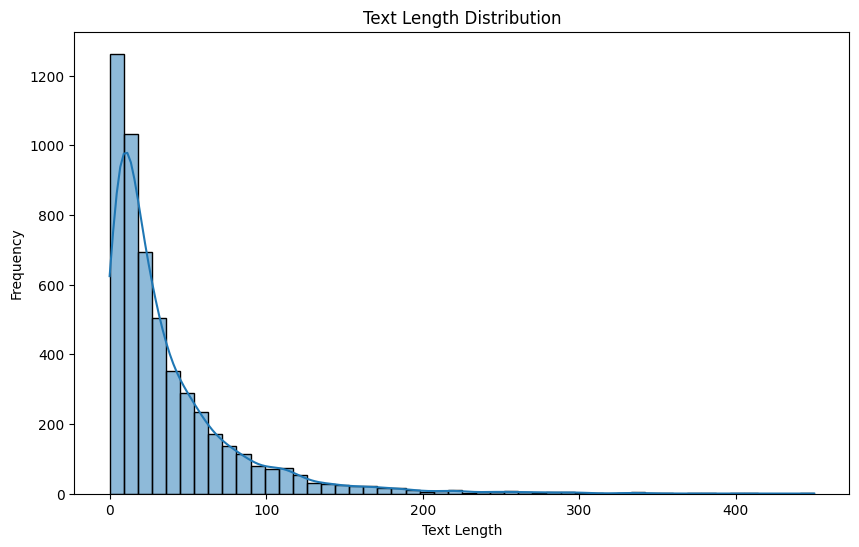

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data_review_threads['text_length'] = data_review_threads['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=data_review_threads, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

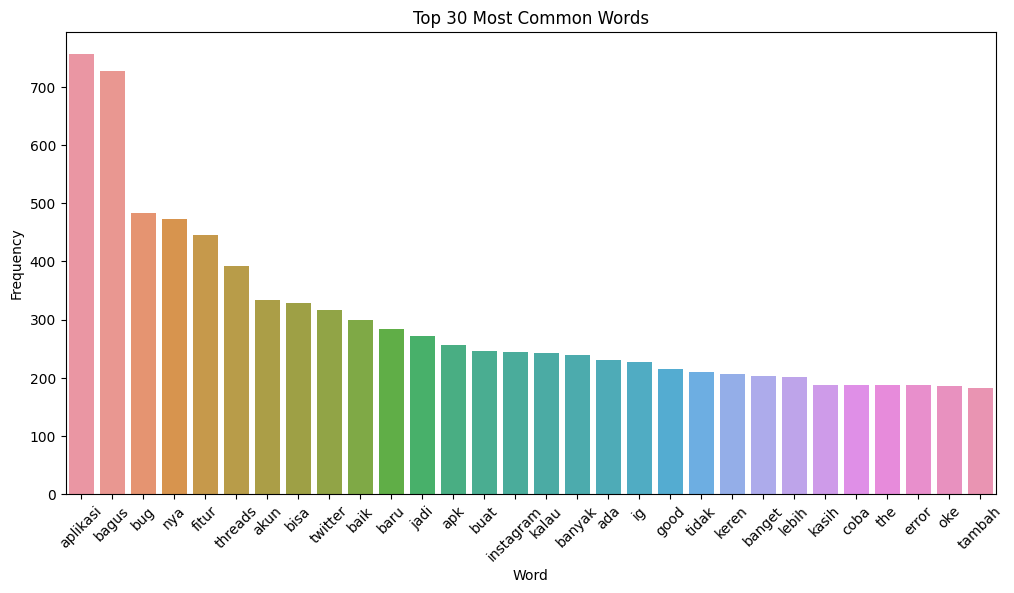

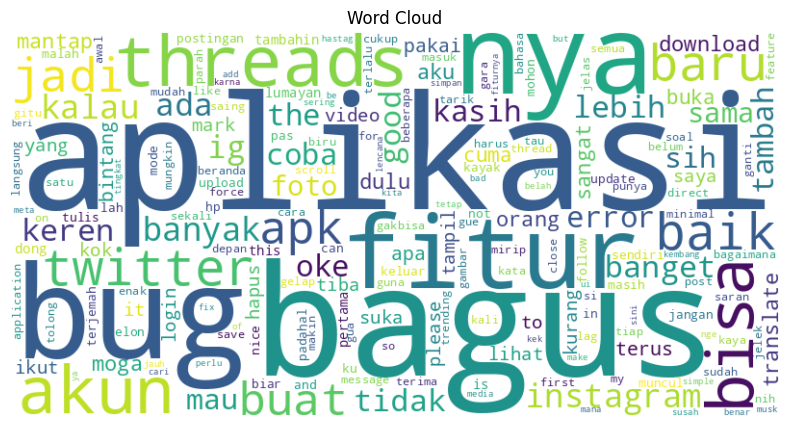

In [13]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(data_review_threads['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 30 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 30 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [14]:
#plotting the word cloud of negative values
a=data_review_threads.loc[data_review_threads['label']=='Negatif'][['contentp_clean','label']]
a

,contentp_clean,label
10,zionis,Negatif
13,bagus,Negatif
16,ada fitur jangan putar otomatis video kasih bi...,Negatif
22,akun tidak nonaktif aktif badge threads ya,Negatif
25,aplikasi asai kaum zionis meta paksa baca post...,Negatif
...,...,...
5210,freeze wkwkw,Negatif
5213,beta banyak bug,Negatif
5262,the application still has lot of bugs one of w...,Negatif
5264,cukup elegan nyaman hari aplikasi ringan mudah...,Negatif


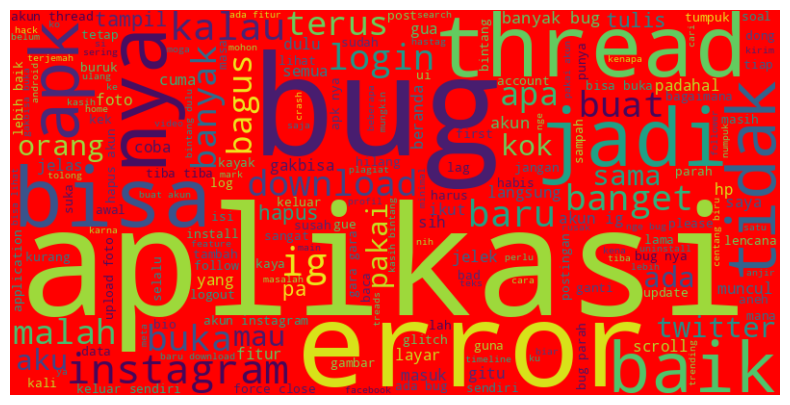

In [15]:
text_corpus = ' '.join(a['contentp_clean'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#plotting the word cloud of neutral values
b=data_review_threads.loc[data_review_threads['label']=='Netral'][['contentp_clean','label']]
b

,contentp_clean,label
0,,Netral
8,susah,Netral
11,,Netral
19,banyak kurang kalau sebut jejer jejer,Netral
41,haha,Netral
...,...,...
5238,baru coba sih,Netral
5263,gg gaming,Netral
5270,error,Netral
5274,aplikasi pas mau upload photo kok tiba tiba me...,Netral


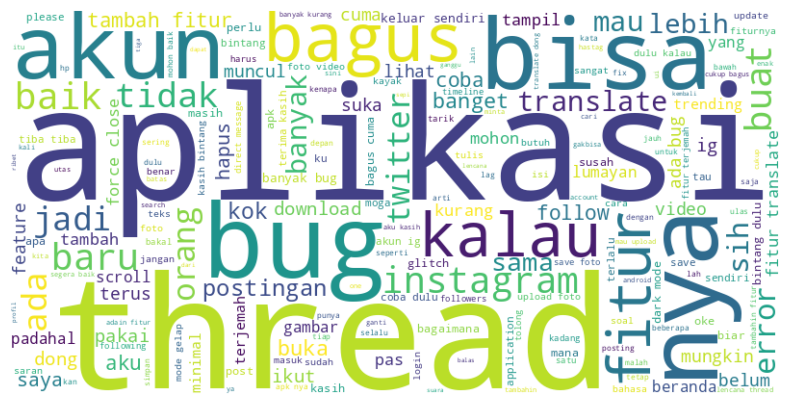

In [17]:
text_corpus = ' '.join(b['contentp_clean'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#plotting the word cloud of Positive values
c=data_review_threads.loc[data_review_threads['label']=='Positif'][['contentp_clean','label']]
c

,contentp_clean,label
1,bagus,Positif
2,baik,Positif
3,suka aku karna hemat kuota harap aplikasi akan...,Positif
4,oke,Positif
5,mantap,Positif
...,...,...
5310,,Positif
5311,hiii aku cepat,Positif
5312,hello bruh,Positif
5313,baru coba meta sedang usaha saing twitter micr...,Positif


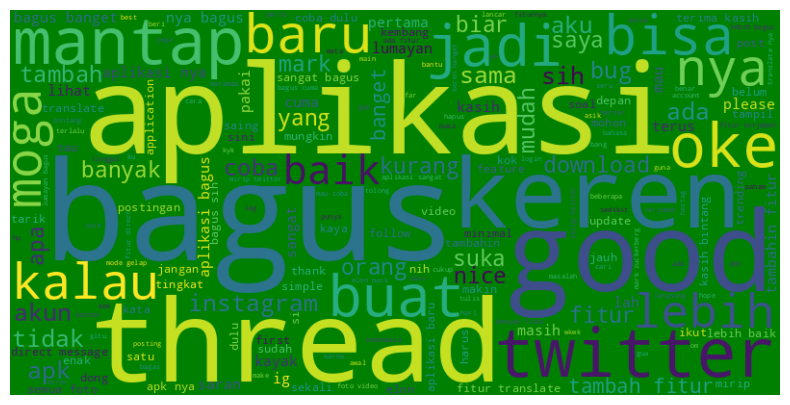

In [19]:
text_corpus = ' '.join(c['contentp_clean'].values)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_corpus)


# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
data_review_threads

,at,userName,content,score,contentp,contentp_clean,label,text_length
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3,sementara,,Netral,0
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,Positif,5
2,2023-11-22 16:57:52,Gusti ngurah,baik,4,baik,baik,Positif,4
3,2023-11-22 15:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5,suka aku karna hemat kuota saya berharap aplik...,suka aku karna hemat kuota harap aplikasi akan...,Positif,71
4,2023-11-22 14:58:02,Jhon Ndesit,Ok,5,ok,oke,Positif,3
...,...,...,...,...,...,...,...,...
5310,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,Positif,0
5311,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,Positif,14
5312,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,Positif,10
5313,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,Positif,151


<Axes: xlabel='score', ylabel='Count'>

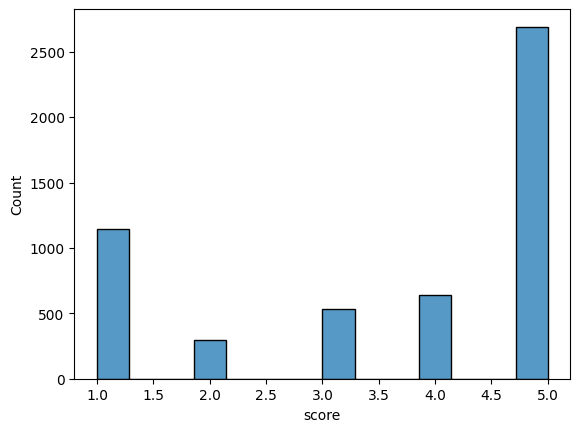

In [21]:
sns.histplot(x='score',data=data_review_threads)

In [23]:
data_review_threads

,at,userName,content,score,contentp,contentp_clean,label,text_length
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3,sementara,,Netral,0
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,Positif,5
2,2023-11-22 16:57:52,Gusti ngurah,baik,4,baik,baik,Positif,4
3,2023-11-22 15:02:11,Kak Andri299,Suka aku karna hemat kuota. Saya berharap apli...,5,suka aku karna hemat kuota saya berharap aplik...,suka aku karna hemat kuota harap aplikasi akan...,Positif,71
4,2023-11-22 14:58:02,Jhon Ndesit,Ok,5,ok,oke,Positif,3
...,...,...,...,...,...,...,...,...
5310,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,Positif,0
5311,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,Positif,14
5312,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,Positif,10
5313,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,Positif,151
